<a href="https://colab.research.google.com/github/oceam/agri-image/blob/main/TensorFlow2beginner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2019 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# TensorFlow 2 CNN quickstart for beginners  
modified by Wei Guo  
also used codes from:  
https://github.com/mrdbourke/m1-machine-learning-test   
2022.08.26

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/quickstart/beginner"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This short introduction uses [Keras](https://www.tensorflow.org/guide/keras/overview) to:

1. Load a prebuilt dataset.
1. Build a neural network machine learning model that classifies images.
2. Train this neural network.
3. Evaluate the accuracy of the model.

This tutorial is a [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb) notebook. Python programs are run directly in the browser—a great way to learn and use TensorFlow. To follow this tutorial, run the notebook in Google Colab by clicking the button at the top of this page.

1. In Colab, connect to a Python runtime: At the top-right of the menu bar, select *CONNECT*.
2. Run all the notebook code cells: Select *Runtime* > *Run all*.

## Set up TensorFlow

Import TensorFlow into your program to get started:

In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.8.2


## Check for GPU

If you're using Google Colab, you'll need to activate a GPU:
1. Go to "Runtime"
2. Go to "Change Runtime Type"
3. Select "GPU"
4. Click "Save" (this will restart the runtime)

If you're using a Mac with an M1 chip, the GPU should already be selected if you've installed TensorFlow correctly.

In [2]:
!nvidia-smi

Sat Aug 27 06:39:00 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
# Check for GPU using TensorFlow
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## Load a dataset

Load and prepare the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html/). Convert the sample data from integers to floating-point numbers:

In [4]:
# Get data from tf.keras.datasets
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170508288/170498071 [==============================] - 5s 0us/step


In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

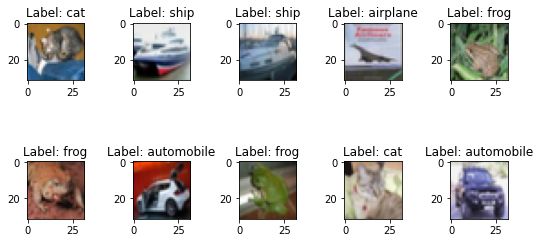

In [6]:
import matplotlib.pyplot as plt
num=10
images = test_images[:num]
labels = test_labels[:num]
num_row = 2
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(class_names[labels[i,0]]))
plt.tight_layout()
plt.show()

## Setup hyperparameters

Change these to suit your needs.

The main one will be the device you're running code on.

E.g. `DEVICE = "Google Colab (K80 GPU)"` if using Google Colab.

In [7]:
# Setup hyperparameters
BATCH_SIZE = 32 # good for your health: https://twitter.com/ylecun/status/989610208497360896
EPOCHS = 10 # only run for a short period of time... we don't have all day
DATASET_NAME = "cifar10" # change this to try other image datasets from TensorFlow Datasets
DEVICE = "Google Colab (Tesla P100-PCIE GPU)" # change this depending on where you're runing the code

## Import dependencies



In [8]:
# Get TensorFlow Datasets
import tensorflow_datasets as tfds

# Get data science libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from timeit import default_timer as timer 

## Prepare data

The data looks good. But before we model it, we're going to prepare it to run as fast as possible using [TensorFlow data loading best practices](https://www.tensorflow.org/guide/data_performance).

In [9]:
# Create datasets 
train_data = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
test_data = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

# Make datasets faster
train_data = train_data.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_data = test_data.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_data, test_data, len(train_data), len(test_data)

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float64, name=None), TensorSpec(shape=(None, 1), dtype=tf.uint8, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float64, name=None), TensorSpec(shape=(None, 1), dtype=tf.uint8, name=None))>,
 1563,
 313)

## Setup and fit model
Build a `tf.keras.Sequential` model by stacking layers.  
We are trying to build a TinyVGG that you just checked from  
[Study_CNN_Explainer (modified with weed dataset) ](https://lab.fieldphenomics.com/Study_CNN_Explainer/)  
Original version is here [CNN explainer website](https://poloclub.github.io/cnn-explainer/).

In [10]:
# Set random seed
tf.random.set_seed(42)

# Start time
start_time = timer()

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(32, 32, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10, activation="softmax") # multi-class activation output
], name="TinyVGG")

# Compile the model
model.compile(loss="sparse_categorical_crossentropy", # since labels aren't one-hot, use sparse_categorical_crossentropy
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit model 
history = model.fit(train_data,
                    epochs=EPOCHS,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data))

# Track time 
end_time = timer()
spend_time=end_time-start_time
print('training used ', spend_time, 's')


Epoch 1/10
1563/1563 [==============================] - 20s 6ms/step - loss: 1.7002 - accuracy: 0.3834 - val_loss: 1.5270 - val_accuracy: 0.4669
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4182 - accuracy: 0.4925 - val_loss: 1.3776 - val_accuracy: 0.5123
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3046 - accuracy: 0.5384 - val_loss: 1.2962 - val_accuracy: 0.5381
Epoch 4/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.2338 - accuracy: 0.5640 - val_loss: 1.2233 - val_accuracy: 0.5633
Epoch 5/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.1817 - accuracy: 0.5836 - val_loss: 1.1707 - val_accuracy: 0.5824
Epoch 6/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.1452 - accuracy: 0.5960 - val_loss: 1.1351 - val_accuracy: 0.5985
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1168 - accuracy: 0.6070 - val_loss: 1.1165 - val_acc

## summarize

In [11]:
results = {
    "device": DEVICE,
    "dataset_name": DATASET_NAME,
    "epochs": EPOCHS,
    "batch_size": BATCH_SIZE,
    "num_train_samples": len(train_data)*BATCH_SIZE,
    "num_test_samples": len(test_data)*BATCH_SIZE,
    "model": model.name
    }
results_df = pd.DataFrame(results, index=[0])
results_df

,device,dataset_name,epochs,batch_size,num_train_samples,num_test_samples,model
0,Google Colab (Tesla P100-PCIE GPU),cifar10,10,32,50016,10016,TinyVGG


## Test the model  
a reminder of data labels:  

['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']  
[0,1,2,3,4,5,6,7,8,9]

The `Model.evaluate` method checks the models performance, usually on a "[Validation-set](https://developers.google.com/machine-learning/glossary#validation-set)" or "[Test-set](https://developers.google.com/machine-learning/glossary#test-set)".

In [33]:
model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 1.0737 - accuracy: 0.6228 - 832ms/epoch - 3ms/step


[1.0737402439117432, 0.6227999925613403]

The ```model.predict``` methods predict a data use the model



In [48]:
print(test_images.shape)
predictions = model.predict(test_images)
print(type(predictions))
print(predictions.shape)

(10000, 32, 32, 3)
<class 'numpy.ndarray'>
(10000, 10)


In [50]:
# probability
print(predictions[5])
# sum of probability
print(predictions[5].sum())

[0.00146443 0.00160143 0.02281703 0.07455918 0.05092487 0.03461013
 0.77467316 0.00883135 0.00403796 0.02648042]
0.99999994


In [51]:
result_img=predictions[5].argmax()
print(class_names[result_img])

frog


['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

Check if the model predicted right answer


  Image shape: (32, 32, 3)
  Image dtype: float64
  Target class from Food101: 6
  Class name (str form): frog
        


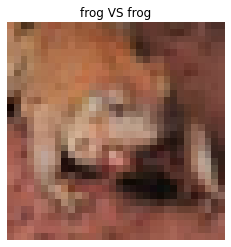

In [52]:
img_id=5
image = test_images[img_id]
label = int(test_labels[img_id])

pred_img=predictions[img_id].argmax()

print(f"""
  Image shape: {image.shape}
  Image dtype: {image.dtype}
  Target class from Food101: {label}
  Class name (str form): {class_names[label]}
        """)
plt.imshow(image)
plt.title(class_names[label]+ ' VS ' +class_names[result_img])
plt.axis(False);

## Conclusion

Congratulations! You have trained a machine learning model using a prebuilt dataset using the [Keras](https://www.tensorflow.org/guide/keras/overview) API.

For more examples of using Keras, check out the [tutorials](https://www.tensorflow.org/tutorials/keras/). To learn more about building models with Keras, read the [guides](https://www.tensorflow.org/guide/keras). If you want learn more about loading and preparing data, see the tutorials on [image data loading](https://www.tensorflow.org/tutorials/load_data/images) or [CSV data loading](https://www.tensorflow.org/tutorials/load_data/csv).